In [7]:
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split

fake = Faker()

# Generate 1000 synthetic texts
texts = [fake.sentence() for _ in range(1000)]
labels = np.random.randint(0, 3, size=1000)  # Random labels: 0, 1, or 2

# Convert labels to one-hot encoding
labels_one_hot = np.eye(3)[labels]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels_one_hot, test_size=0.2, random_state=42)


In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Tokenize text data
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

# Convert text data to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_sequence_length = max(len(seq) for seq in X_train_seq + X_test_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)


In [9]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from sklearn.metrics import confusion_matrix, classification_report

# Define RNN model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test), verbose=2)


Epoch 1/10
25/25 - 4s - loss: 1.0982 - accuracy: 0.3525 - val_loss: 1.1019 - val_accuracy: 0.3300 - 4s/epoch - 160ms/step
Epoch 2/10
25/25 - 0s - loss: 1.0855 - accuracy: 0.3988 - val_loss: 1.1088 - val_accuracy: 0.3200 - 370ms/epoch - 15ms/step
Epoch 3/10
25/25 - 0s - loss: 1.0299 - accuracy: 0.5350 - val_loss: 1.1700 - val_accuracy: 0.3250 - 381ms/epoch - 15ms/step
Epoch 4/10
25/25 - 0s - loss: 0.8341 - accuracy: 0.6488 - val_loss: 1.2585 - val_accuracy: 0.3050 - 434ms/epoch - 17ms/step
Epoch 5/10
25/25 - 0s - loss: 0.6233 - accuracy: 0.7713 - val_loss: 1.4947 - val_accuracy: 0.3050 - 372ms/epoch - 15ms/step
Epoch 6/10
25/25 - 0s - loss: 0.4337 - accuracy: 0.8425 - val_loss: 1.7576 - val_accuracy: 0.3200 - 431ms/epoch - 17ms/step
Epoch 7/10
25/25 - 0s - loss: 0.2719 - accuracy: 0.9150 - val_loss: 2.1706 - val_accuracy: 0.3400 - 374ms/epoch - 15ms/step
Epoch 8/10
25/25 - 0s - loss: 0.1966 - accuracy: 0.9287 - val_loss: 2.6776 - val_accuracy: 0.3200 - 424ms/epoch - 17ms/step
Epoch 9/10

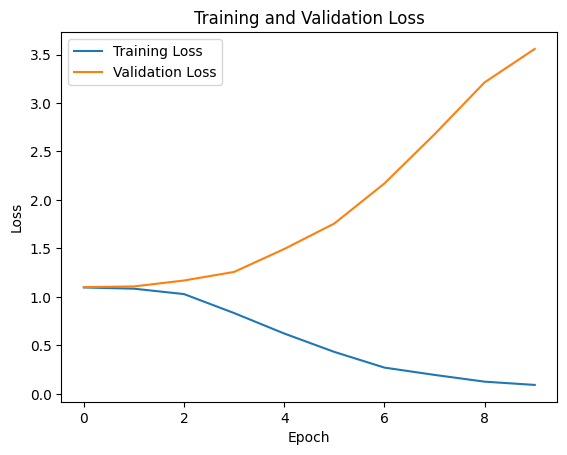

In [10]:
# 1. Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

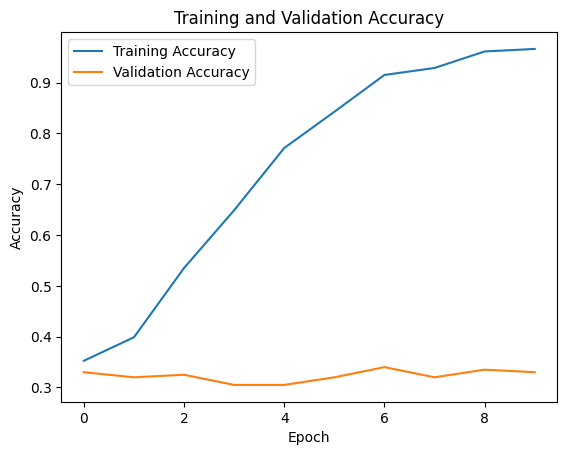

In [11]:
# 2. Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7/7 [==============================] - 1s 10ms/step


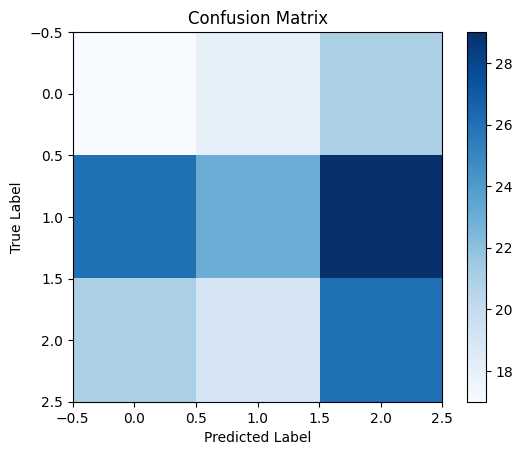

In [12]:
# 3. Confusion Matrix
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
# 4. Classification Report
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.27      0.30      0.28        56
           1       0.38      0.29      0.33        78
           2       0.34      0.39      0.37        66

    accuracy                           0.33       200
   macro avg       0.33      0.33      0.33       200
weighted avg       0.34      0.33      0.33       200



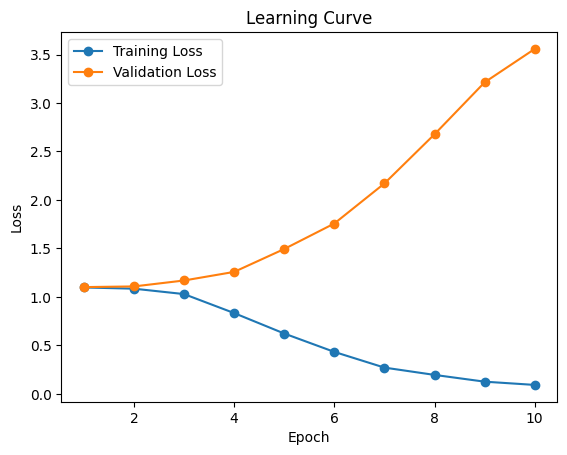

In [14]:
# 5. Learning Curve
train_sizes = np.arange(1, len(history.history['loss']) + 1)
plt.plot(train_sizes, history.history['loss'], 'o-', label='Training Loss')
plt.plot(train_sizes, history.history['val_loss'], 'o-', label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

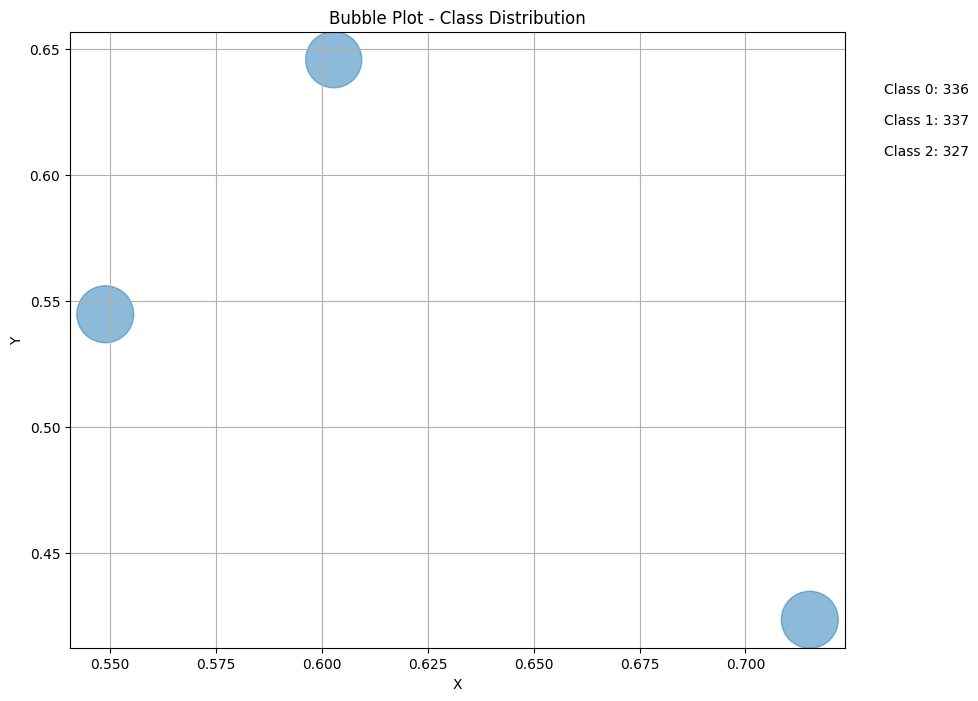

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 synthetic texts
texts = [fake.sentence() for _ in range(1000)]
labels = np.random.randint(0, 3, size=1000)  # Random labels: 0, 1, or 2

# Count the occurrences of each class label
unique_labels, counts = np.unique(labels, return_counts=True)

# Generate random data for demonstration purposes
np.random.seed(0)
x = np.random.rand(len(unique_labels))  # x-coordinate
y = np.random.rand(len(unique_labels))  # y-coordinate
sizes = counts * 5  # Bubble sizes proportional to class counts

# Create the bubble plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=sizes, alpha=0.5)
plt.title('Bubble Plot - Class Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Add legend with class labels and counts
for i, label in enumerate(unique_labels):
    plt.text(1.05, 0.9 - i*0.05, f'Class {label}: {counts[i]}', transform=plt.gca().transAxes)

plt.show()


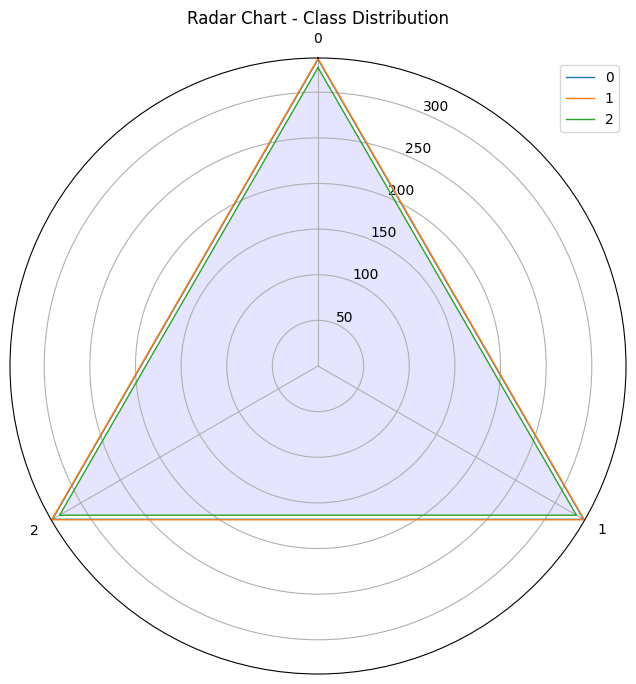

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Generate 1000 synthetic texts
texts = [fake.sentence() for _ in range(1000)]
labels = np.random.randint(0, 3, size=1000)  # Random labels: 0, 1, or 2

# Count the occurrences of each class label
unique_labels, counts = np.unique(labels, return_counts=True)

# Define the number of variables for the radar chart (in this case, 3 classes)
num_vars = len(unique_labels)

# Create a list of evenly spaced angles for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repeat the first angle to close the circle
angles += angles[:1]

# Create radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], unique_labels)

# Plot each class distribution
for i, (label, count) in enumerate(zip(unique_labels, counts)):
    values = [count] * num_vars
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=label)

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Radar Chart - Class Distribution')
plt.legend(loc='upper right')
plt.show()
